In [1]:
library('palmerpenguins')
penguins = penguins[complete.cases(penguins),]
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007


In [2]:
colnames(penguins)[3:5]

[1] "bill_length_mm"    "bill_depth_mm"     "flipper_length_mm"

In [3]:
X = penguins[,3:5]

In [4]:
Xc = scale(X,scale=TRUE,center=TRUE)

In [5]:
svd_X = svd(Xc)

In [6]:
U_df = svd_X$u[,1:2]
colnames(U_df) = paste0('PC',1:2)
U_df = data.frame(U_df)

In [7]:
U_df = cbind(penguins[,-(3:5)],U_df)

In [8]:
head(U_df)

,species,island,body_mass_g,sex,year,PC1,PC2
,<fct>,<fct>,<int>,<fct>,<int>,<dbl>,<dbl>
1,Adelie,Torgersen,3750,male,2007,-0.07118659,0.003131873
2,Adelie,Torgersen,3800,female,2007,-0.04736429,0.030416439
3,Adelie,Torgersen,3250,female,2007,-0.03381060,0.008604952
4,Adelie,Torgersen,3450,female,2007,-0.06468580,0.004744301
5,Adelie,Torgersen,3650,male,2007,-0.07309065,-0.045291562
6,Adelie,Torgersen,3625,female,2007,-0.06289699,0.026154999


In [9]:
library('ggplot2')

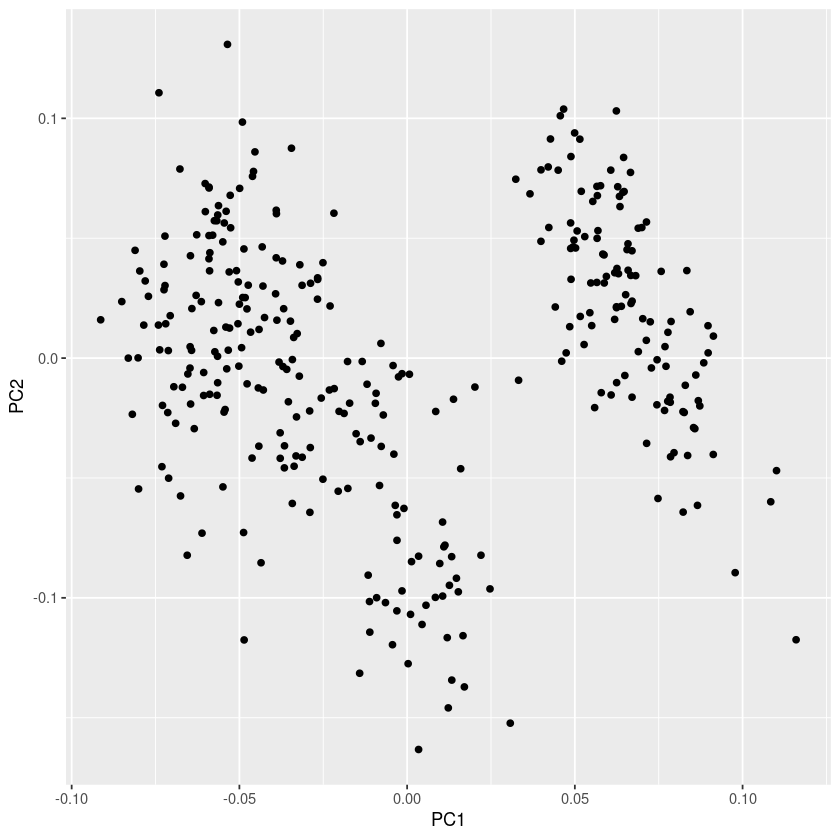

In [29]:
ggplot(data=U_df,mapping=aes(x=PC1,y=PC2))+geom_point()

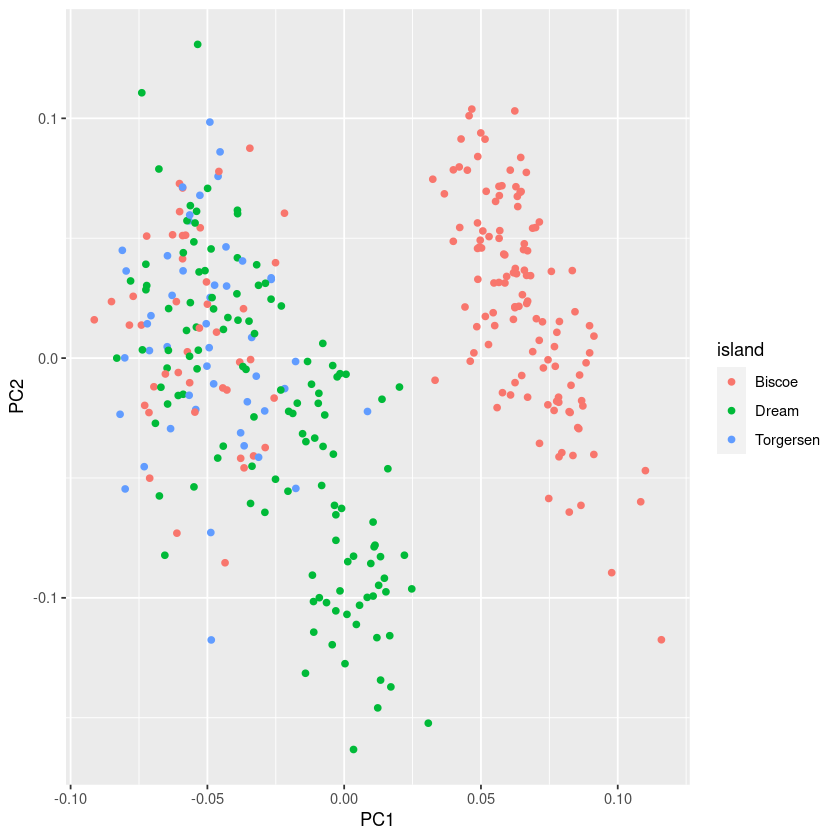

In [30]:
ggplot(data=U_df,mapping=aes(x=PC1,y=PC2,color=island))+geom_point()

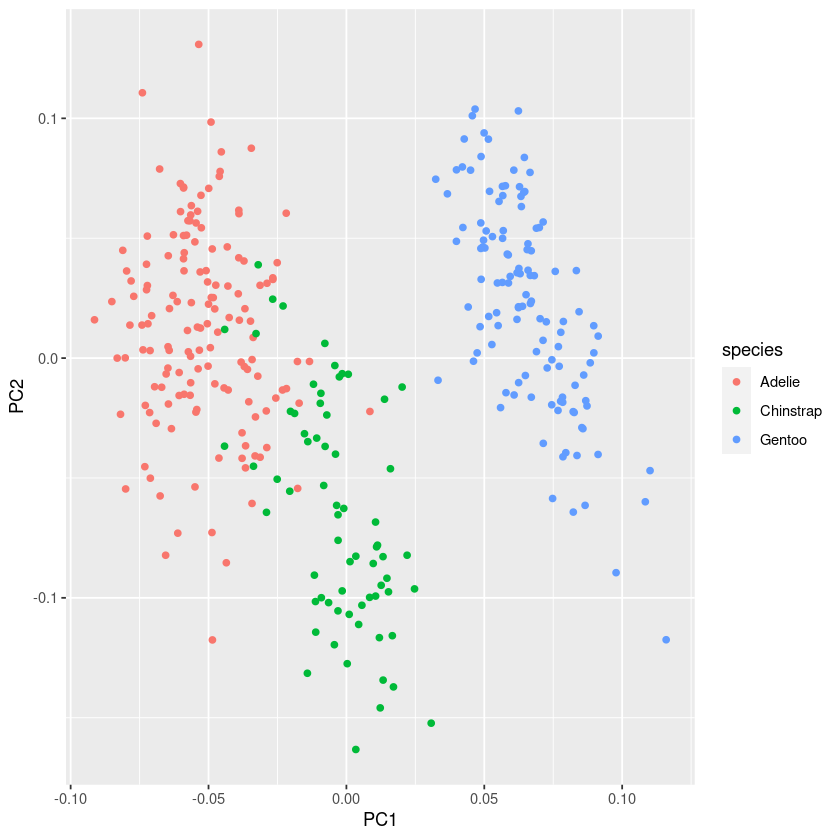

In [12]:
ggplot(data=U_df,mapping=aes(x=PC1,y=PC2,color=species))+geom_point()

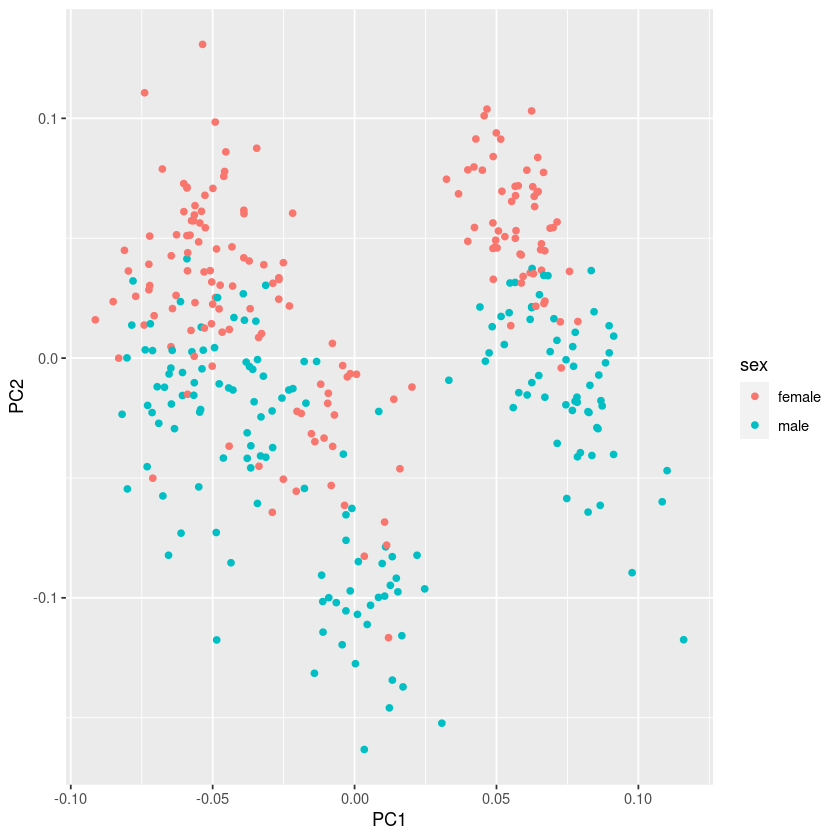

In [13]:
ggplot(data=U_df,mapping=aes(x=PC1,y=PC2,color=sex))+geom_point()

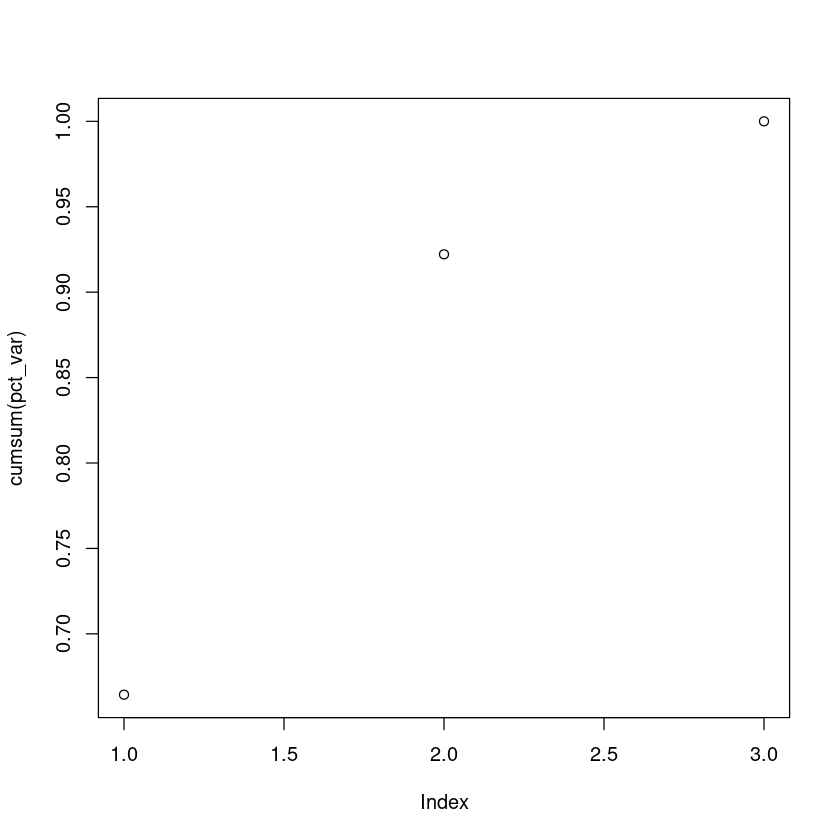

In [14]:
pct_var = svd_X$d^2/sum(svd_X$d^2)
plot(cumsum(pct_var))

### prcomp

In [15]:
library('MASS')

In [16]:
pr.out = prcomp(X,center=TRUE,scale=TRUE)

In [17]:
names(pr.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [18]:
pr.out$sdev

[1] 1.4117954 0.8794016 0.4832045

In [19]:
sqrt(svd_X$d^2/(nrow(Xc)-1))

[1] 1.4117954 0.8794016 0.4832045

In [20]:
W = pr.out$rotation

In [21]:
head(W[,1:2])

,PC1,PC2
bill_length_mm,0.5513631,-0.65493615
bill_depth_mm,-0.5107043,-0.75478128
flipper_length_mm,0.6596816,-0.03693055


In [22]:
head(svd_X$v[,1:2])

0.5513631,-0.65493615
-0.5107043,-0.75478128
0.6596816,-0.03693055


In [23]:
head(pr.out$x[,1:2])

PC1,PC2
-1.8312137,0.05018344
-1.2184054,0.48737657
-0.8697485,0.13788110
-1.6639864,0.07602012
-1.8801939,-0.72572749
-1.6179709,0.41909356


In [24]:
head(svd_X$u[,1:2]%*%diag(svd_X$d[1:2]))

-1.8312137,0.05018344
-1.2184054,0.48737657
-0.8697485,0.13788110
-1.6639864,0.07602012
-1.8801939,-0.72572749
-1.6179709,0.41909356


## low d rep

In [31]:
library('png')

In [32]:
out = readPNG('./wm.png')

In [33]:
library('ggplot2')

In [34]:
MAT = out[,,1]

In [35]:
df = reshape2::melt(MAT)

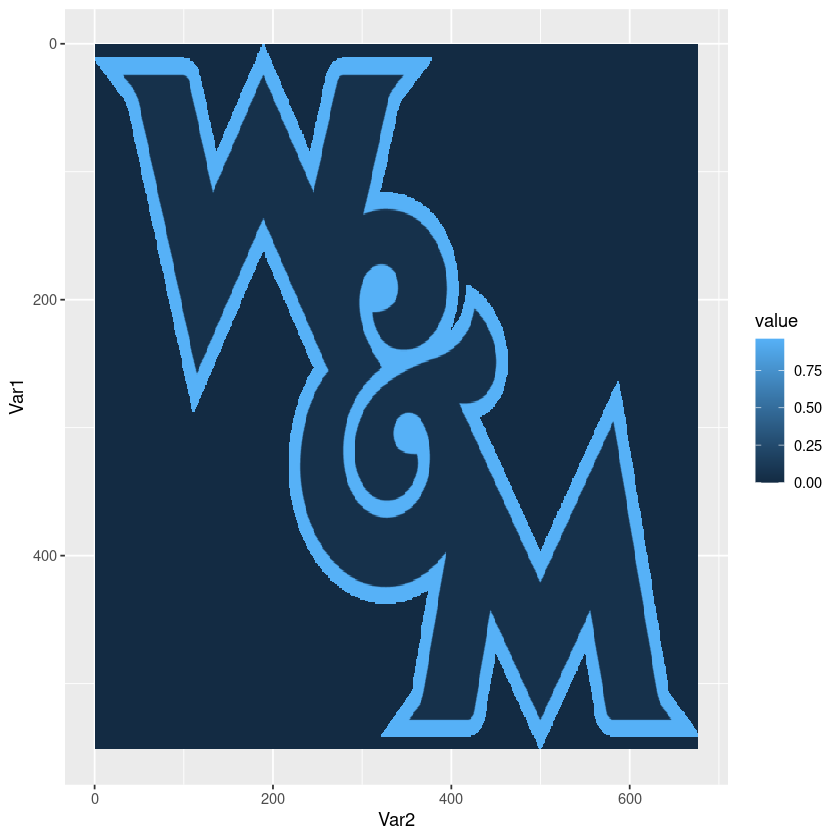

In [36]:
ggplot(data=df,mapping=aes(x=Var2,y=Var1,fill=value))+geom_tile()+scale_y_reverse()

In [37]:
svdm = svd(MAT)

In [38]:
s2 = svdm$d^2/sum(svdm$d^2)
cpct = cumsum(s2)

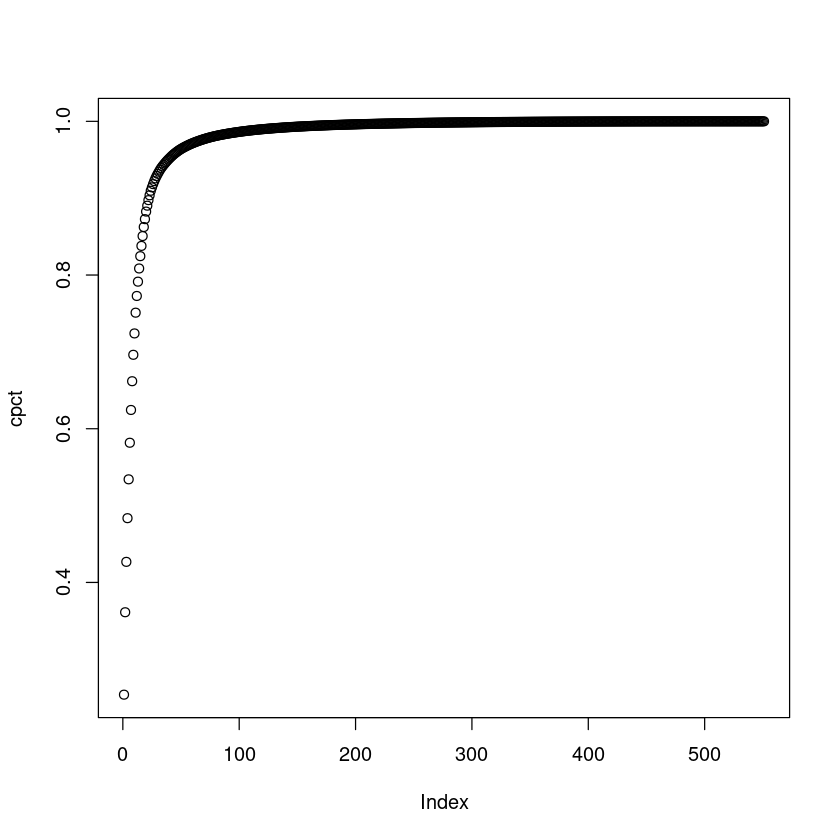

In [39]:
plot(cpct)

In [40]:
which.max(cpct>.80)

[1] 14

In [41]:
sum(svdm$d>1E-10)

[1] 548

In [50]:
k = 25

In [51]:
Xk = svdm$u[,1:k,drop=FALSE]%*%diag(svdm$d[1:k,drop=FALSE])%*%t(svdm$v[,1:k,drop=FALSE])

In [52]:
udf = reshape2::melt(Xk)

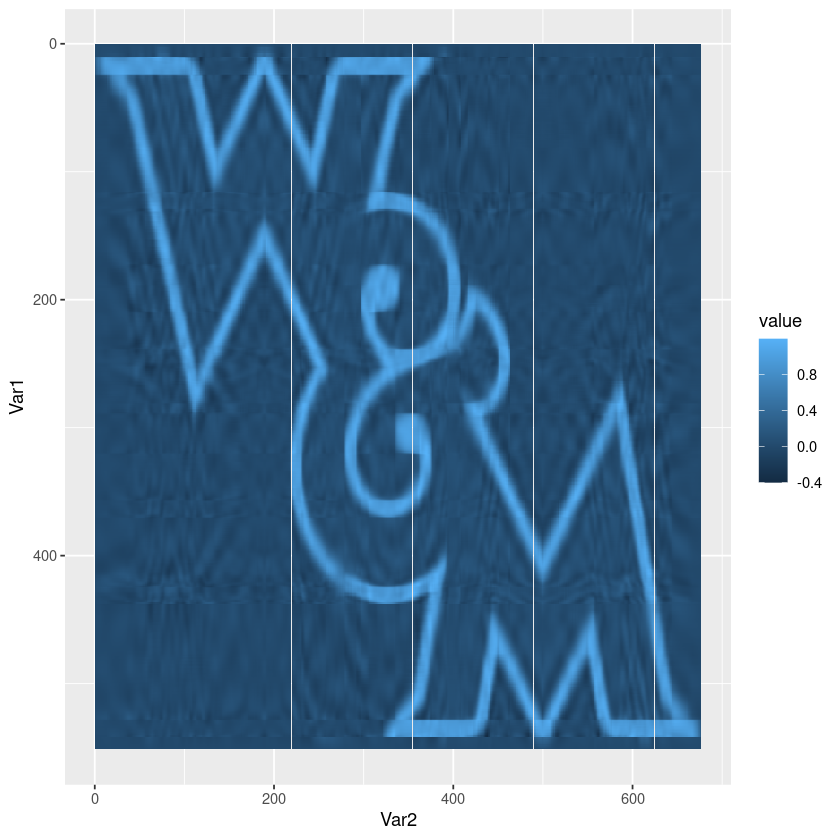

In [53]:
ggplot(data=udf,mapping=aes(x=Var2,y=Var1,fill=value))+geom_tile()+scale_y_reverse()